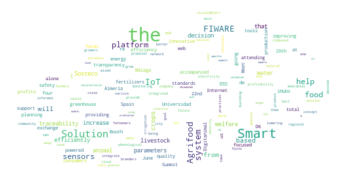

In [2]:
!pip install newspaper3k
from newspaper import Article
import pandas as pd
article = Article('https://www.fiware.org/2018/06/18/10-innovative-fiware-powered-smart-solutions-for-agrifood/', 'pt-br')
article.download()
article.parse()

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

STOPWORDS = ['be', 'in', 'to', 'and', 'We', 
             'not', 'of', 'ten', 'for', 'An', 'This',
             'is', 'on', 'use', 'It', 'Their', 'all', 
             'resources', 'These', 'other', 'later', 'users', 'how', 'includes', 'a',
             'by', 'open', 'current', 'problem', 'where', 'they', 'are',
             'out', 'an', 'data', 'are', 'with', 'can']

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image
def create_word_cloud(string):
    maskArray = np.array(Image.open("cloud.png"))
    cloud = WordCloud(background_color = "white", max_font_size=50, max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))
    cloud.generate(string)
    cloud.to_file("wordCloud.png")
    plt.figure()
    plt.imshow(cloud, interpolation = 'bilinear')
    plt.axis('off')
    
create_word_cloud(article.text)

In [4]:
# dataset de casos de covid 19 (site referência https://brasil.io/dataset/covid19/caso_full/)
df = pd.read_csv('caso_full.csv')
df.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-25,0.0,0,1,city,SP,1,0
1,NaN,35.0,2020-02-25,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-25,0.0,0,1,state,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-26,0.0,0,2,city,SP,0,0
3,NaN,35.0,2020-02-26,9,46289333.0,45919049.0,False,False,1,0.00216,2020-02-26,0.0,0,2,state,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12325232.0,12252023.0,False,False,1,0.00811,2020-02-27,0.0,0,3,city,SP,0,0


In [6]:
# novos casos confirmados (site referência https://brasil.io/dataset/covid19/caso_full/)
df['new_confirmed'].value_counts().head()

0    865023
1    161719
2     81696
3     53046
4     38117
Name: new_confirmed, dtype: int64

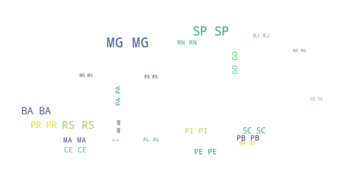

In [9]:
# os 5 Estados com mais casos de covid 19 confirmados (site referência https://brasil.io/dataset/covid19/caso_full/)
df['state'].value_counts().head()
estados = " ".join(df['state'].tolist() )
create_word_cloud(estados)

In [8]:
# data da coleta dos casos de covid 19 confirmados (site referência https://brasil.io/dataset/covid19/caso_full/)
df['date'].value_counts().head()

2020-10-24    5616
2020-12-14    5616
2020-11-29    5616
2021-01-03    5616
2020-10-29    5616
Name: date, dtype: int64

In [10]:
# quantidade de novas mortes por causa da covid 19 (site referência https://brasil.io/dataset/covid19/caso_full/)
df['new_deaths'].value_counts().head()

0    1373251
1      60815
2      13108
3       5613
4       3132
Name: new_deaths, dtype: int64